# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
import statsmodels.api as sm
import math

In [3]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
atletas = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
atletas.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [7]:
altura_sample = get_sample(atletas, 'height', n =300)
altura_sample

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
7036     1.83
8199     1.67
1673     1.78
6077     1.76
7582     1.78
Name: height, Length: 300, dtype: float64

In [8]:
retorno = sct.shapiro(altura_sample)
retorno[0]
if retorno[1] == 0.05:
    print( True)
else:
    print( False)

False


In [9]:
retorno[1]

0.14418388903141022

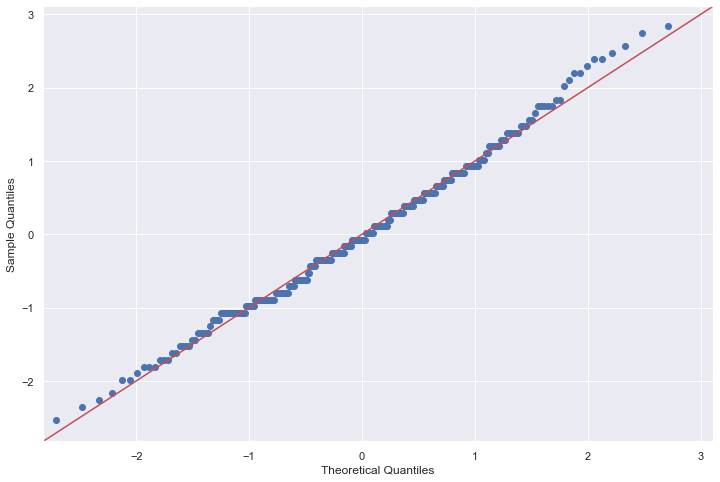

In [10]:
sm.qqplot(altura_sample, fit=True, line="45");

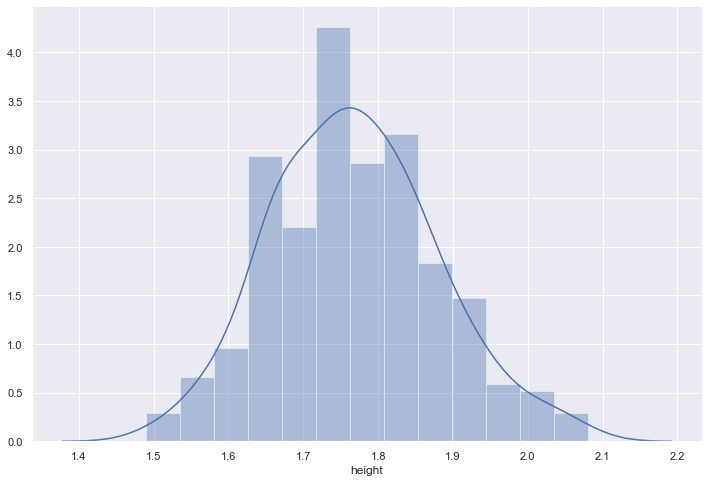

In [11]:
sns.distplot(altura_sample)

In [12]:
retornojb = sct.jarque_bera(altura_sample)
retornojb[1]
if retornojb[1] == 0.05:
    print(True)
else:
    print(False)

False


In [13]:
peso_sample = get_sample(atletas, 'weight', n=3000)

In [14]:
retornont = sct.normaltest(peso_sample)
retornont[1]
if retornont[1] == 0.05:
    print(True)
else:
    print(False)

False


In [15]:
peso_transform = np.log(peso_sample)

In [16]:
return_t = sct.normaltest(peso_transform)
if return_t[1] <= 0.05:
    print( True)
else:
    print( False)

True


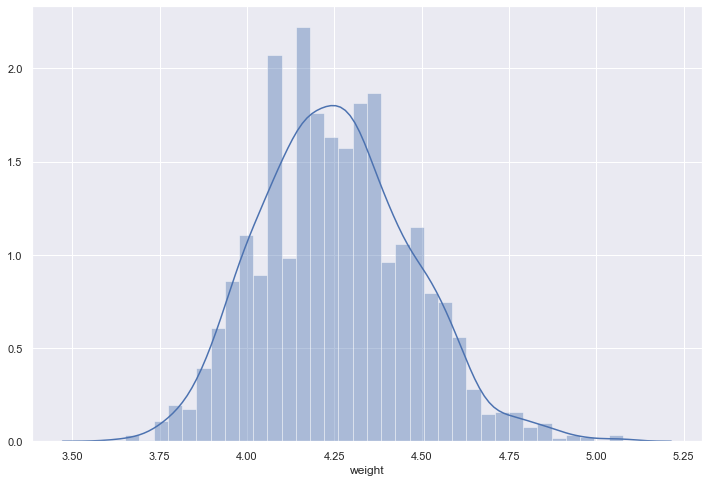

In [17]:
sns.distplot(peso_transform)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
def q1():
    retorno = sct.shapiro(altura_sample)
    if retorno[1] <= 0.05 and retorn[1] >= 0.001:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [19]:
def q2():
    retornojb = sct.jarque_bera(altura_sample)
    retornojb[1]
    if retornojb[1] <= 0.05 and retornjb[1] >= 0.001:
        return True
    else:
        return False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
def q3():
    retornont = sct.normaltest(peso_sample)
    if retornont[1] <= 0.050 and retornont[1] >= 0.001:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [21]:
def q4():
    peso_transform = np.log(peso_sample)
    return_t = sct.normaltest(peso_transform)
    if return_t[1] <= 0.050 and return_t[1] >= 0.001:
        return True
    else:
        return False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [22]:
def q5():
    nacionalidade = atletas.query('nationality == "BRA" | nationality == "USA" | nationality == "CAN"')
    selecao_bra = nacionalidade['nationality'] == 'BRA'
    selecao_usa = nacionalidade['nationality'] == 'USA'
    selecao_can = nacionalidade['nationality'] == 'CAN'
    bra = nacionalidade[selecao_bra]
    usa = nacionalidade[selecao_usa]
    can = nacionalidade[selecao_can]
    
    brah_sample = get_sample(bra, 'height', n = 400)
    usah_sample = get_sample(usa, 'height', n = 400)
    
    retornoth = sct.ttest_ind(brah_sample, usah_sample)
    if retornoth[1] <= 0.005 and retornoth[1] >= 0.0001:
        return True
    else:
        return False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [23]:
def q6():
    nacionalidade = atletas.query('nationality == "BRA" | nationality == "USA" | nationality == "CAN"')
    selecao_bra = nacionalidade['nationality'] == 'BRA'
    selecao_usa = nacionalidade['nationality'] == 'USA'
    selecao_can = nacionalidade['nationality'] == 'CAN'
    bra = nacionalidade[selecao_bra]
    usa = nacionalidade[selecao_usa]
    can = nacionalidade[selecao_can]
    
    canh_sample = get_sample(can, 'height', n = 300)
    brah_sample2 = get_sample(bra,'height', n = 300)
    retornoth2 = sct.ttest_ind(brah_sample2, canh_sample)
    if retornoth2[1] < 0.50 and retornoth2[1] >= 0.001:
        return True
    else:
        return False

In [24]:
    nacionalidade = atletas.query('nationality == "BRA" | nationality == "USA" | nationality == "CAN"')
    selecao_bra = nacionalidade['nationality'] == 'BRA'
    selecao_usa = nacionalidade['nationality'] == 'USA'
    selecao_can = nacionalidade['nationality'] == 'CAN'
    bra = nacionalidade[selecao_bra]
    usa = nacionalidade[selecao_usa]
    can = nacionalidade[selecao_can]

In [25]:
    canh_sample = get_sample(can, 'height', n = 300)
    brah_sample2 = get_sample(bra,'height', n = 300)
    retornoth2 = sct.ttest_ind(brah_sample2, canh_sample)

In [26]:
    if retornoth2[1] < 0.50 and retornoth2[1] >= 0.001:
        print( True)
    else:
        print( False)

True


In [27]:
retornoth2[1].round(3)

0.498

In [28]:
bra.shape, can.shape

((485, 11), (321, 11))

In [29]:
canh_sample.mean(), brah_sample2.mean()

(1.7578333333333331, 1.7643666666666669)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [30]:
def q7():
    nacionalidade = atletas.query('nationality == "BRA" | nationality == "USA" | nationality == "CAN"')
    selecao_bra = nacionalidade['nationality'] == 'BRA'
    selecao_usa = nacionalidade['nationality'] == 'USA'
    selecao_can = nacionalidade['nationality'] == 'CAN'
    bra = nacionalidade[selecao_bra]
    usa = nacionalidade[selecao_usa]
    can = nacionalidade[selecao_can]
    
    canh_sample = get_sample(can, 'height', n = 300)
    usah_sample = get_sample(usa,'height', n= 560)
    retornth3 = sct.ttest_ind(canh_sample, usah_sample)
    return retornth3[1].round(8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?